In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

### <span style="color:#1E824C">Agenda</span>

The data preparation follows an ELT (Extract, Load, Transform) approach focused on preparing the seafood dataset for analysis. The goal of this process is to ensure that the dataset is clean, structured, and machine-readable, making it suitable for both business intelligence dashboards and AI modeling. By transforming raw data into a consistent and analytical format, it could uncover patterns related to pricing and profitability and lay the foundation for accurate predictions in future sprints.

### <span style="color:#1E824C">Load Dataset</span>


In [2]:
dataset = r'..\data\fish_shelfish_dataset.csv'
df = pd.read_csv(dataset, header=0)

### <span style="color:#1E824C"> Inspect the data</span>
In this section I will inspect the dataset, to get a better understanding before cleaning it. 

The focus here, is to understand the looks of the dataset, checking for missing values or duplicated row and to get a look at the colmuns and ranges

In [3]:
# View first 5 rows
df.head()

,name,type,price_dk,season_availability,weight_g,length_cm,width_cm,height_cm,cost_dk,year,freight_charge
0,Aborre,fish,188.32,Spring,706.4,128.9,15.3,10.4,133.03,2021,2.60
1,Blåmusling,shellfish,202.72,Spring,2485.0,54.8,24.1,19.4,503.76,2021,1.50
2,Line_blåmusling,shellfish,73.92,Summer,3761.7,33.8,17.2,4.1,278.06,2021,2.07
3,Canadisk_hummer,shellfish,265.14,Spring,2639.3,57.7,24.8,6.0,699.78,2021,4.20
4,Dansk_10-armet_blæksprutte,fish,169.26,Spring,2812.6,95.1,35.9,29.5,476.06,2021,3.32


In [4]:
# View last 5 rows
df.tail()

,name,type,price_dk,season_availability,weight_g,length_cm,width_cm,height_cm,cost_dk,year,freight_charge
995,Hvilling,fish,120.59,Autumn,2062.53,11.69,4.80,23.88,262.37,2022,2.50
996,Fjæsing,fish,227.90,Summer,496.48,102.24,31.74,9.22,116.25,2022,4.42
997,Sort_hummer,shellfish,68.36,Winter,1819.00,79.63,2.65,10.62,133.92,2023,4.05
998,Ørred,fish,83.40,Spring,2888.97,12.80,34.93,3.72,232.89,2024,3.70
999,Fjæsing,fish,304.81,Spring,4505.29,144.17,12.27,13.69,1309.31,2024,3.53


In [5]:
# Returns the number of rows and columns
df.shape

(1000, 11)

In [6]:
# Shows all column names
df.columns

Index(['name', 'type', 'price_dk', 'season_availability', 'weight_g',
       'length_cm', 'width_cm', 'height_cm', 'cost_dk', 'year',
       'freight_charge'],
      dtype='object')

In [7]:
# 	Shows types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1000 non-null   object 
 1   type                 1000 non-null   object 
 2   price_dk             1000 non-null   float64
 3   season_availability  1000 non-null   object 
 4   weight_g             1000 non-null   float64
 5   length_cm            1000 non-null   float64
 6   width_cm             1000 non-null   float64
 7   height_cm            1000 non-null   float64
 8   cost_dk              1000 non-null   float64
 9   year                 1000 non-null   int64  
 10  freight_charge       1000 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


In [8]:
# Show count, mean, std, min, max (numeric only by default)
df.describe()

,price_dk,weight_g,length_cm,width_cm,height_cm,cost_dk,year,freight_charge
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,167.154320,2554.532200,78.497110,19.807010,15.515270,434.307980,2022.598000,3.305070
std,73.835612,1391.337876,40.928795,11.256076,8.249302,333.297669,1.667686,1.112337
min,31.860000,98.720000,9.980000,2.140000,1.100000,7.000000,2020.000000,1.270000
25%,102.392500,1326.732500,43.762500,9.100000,8.400000,169.135000,2021.000000,2.400000
50%,169.075000,2593.950000,76.395000,19.875000,15.740000,362.070000,2023.000000,3.390000
75%,229.730000,3713.615000,113.910000,29.467500,22.650000,625.262500,2024.000000,4.270000
max,311.850000,5169.950000,156.220000,41.480000,31.200000,1376.320000,2025.000000,5.380000


In [9]:
# Shows missing values pr. column
df.isnull().sum()

name                   0
type                   0
price_dk               0
season_availability    0
weight_g               0
length_cm              0
width_cm               0
height_cm              0
cost_dk                0
year                   0
freight_charge         0
dtype: int64

In [10]:
# Count of unique entries pr. column
df.nunique()

name                    45
type                     2
price_dk               974
season_availability      5
weight_g               998
length_cm              940
width_cm               826
height_cm              794
cost_dk                995
year                     6
freight_charge         363
dtype: int64

In [11]:
# Count duplicate rows
df.duplicated().sum()

0

In [12]:
# See all column data types
df.dtypes

name                    object
type                    object
price_dk               float64
season_availability     object
weight_g               float64
length_cm              float64
width_cm               float64
height_cm              float64
cost_dk                float64
year                     int64
freight_charge         float64
dtype: object

### <span style="color:#1E824C"> Clean the data</span>
This section are focusing on cleaning the data by renaming confusing columns for clarity, add columns if needed and convert categorical columns to numeric varables, so that they can be used in machine learning algorithms.
This cleaning process ensures that the dataset is structured, consistent, and ready for further BI exploration and AI-based modeling. It forms the foundation for reliable insights and accurate predictions in the next phases of the project

### <span style="color:#1E824C"> Transform the data</span>
* Renaming and adding columnms 

In [13]:
df.rename(columns={'price_dk': 'price_kr', 'cost_dk': 'cost_kr', 'freight_charge': 'freight_charge_kr'}, inplace=True)

In [14]:
# Calculate the profit for each row and add column:
df['profit_kr'] = df['price_kr'] - df['cost_kr']

In [15]:
df[['price_kr', 'cost_kr', 'profit_kr']].head()

,price_kr,cost_kr,profit_kr
0,188.32,133.03,55.29
1,202.72,503.76,-301.04
2,73.92,278.06,-204.14
3,265.14,699.78,-434.64
4,169.26,476.06,-306.80


In [16]:
print(df.columns.tolist())

['name', 'type', 'price_kr', 'season_availability', 'weight_g', 'length_cm', 'width_cm', 'height_cm', 'cost_kr', 'year', 'freight_charge_kr', 'profit_kr']


#### <span style="color:#1E824C"> Convert data types</span>
* name
* type
* season_availability

In [17]:
# Convert each category into new binary
df = pd.get_dummies(df, columns=['name', 'type', 'season_availability'], drop_first=False)

### <span style="color:#1E824C"> Data Exploration & Visualizations</span>
In this section, I will explore the dataset to better understand its structure and identify patterns that could influence pricing and profitability. I will calculate descriptive statistics for the numeric data to get an overview of central tendencies, variability, and possible anomalies. I will then create targeted visualizations to support our exploration to get insights in which features to include in future predictive models and BI dashboards.

In [18]:
dependent = ['price_kr','profit_kr']
all_independent = [col for col in df.columns if col not in ['price_kr', 'profit_kr']]
print("All Independent variables:")
all_independent

All Independent variables:


['weight_g',
 'length_cm',
 'width_cm',
 'height_cm',
 'cost_kr',
 'year',
 'freight_charge_kr',
 'name_Aborre',
 'name_Blåmusling',
 'name_Canadisk_hummer',
 'name_Dansk_10-armet_blæksprutte',
 'name_Fjordreje',
 'name_Fjæsing',
 'name_Flodkrebs',
 'name_Gedde',
 'name_Havkat',
 'name_Havtaske',
 'name_Helleflynder',
 'name_Helt',
 'name_Hornfisk',
 'name_Hvilling',
 'name_Ising',
 'name_Jomfruhummer',
 'name_Knude',
 'name_Knurhane',
 'name_Kuller',
 'name_Kulmule',
 'name_Laks_vild',
 'name_Lange',
 'name_Levende_norsk_kongekrabbe',
 'name_Line_blåmusling',
 'name_Lyssej',
 'name_Makrel',
 'name_Multe',
 'name_Mørksej',
 'name_Nordsøreje',
 'name_Norske_kammusling_i_skal',
 'name_Pighvar',
 'name_Rødspætte',
 'name_Rødtunge',
 'name_Sandart',
 'name_Signalkrebs',
 'name_Sild',
 'name_Skrubbe',
 'name_Skærising',
 'name_Slethvar',
 'name_Smelt',
 'name_Sort_hummer',
 'name_Stenbider',
 'name_Torsk',
 'name_Ørred',
 'name_Østers',
 'type_fish',
 'type_shellfish',
 'season_availability

#### <span style="color:#1E824C"> Visualize features - Focus on price </span>
* Price vs Weight
* Price vs Freight charge
* Profit by season
* Price by Year
* Correlation Matrix
* Correlation Heatmap 
    1. Factors That Influence Price
    2. Factors That Influence Profitability

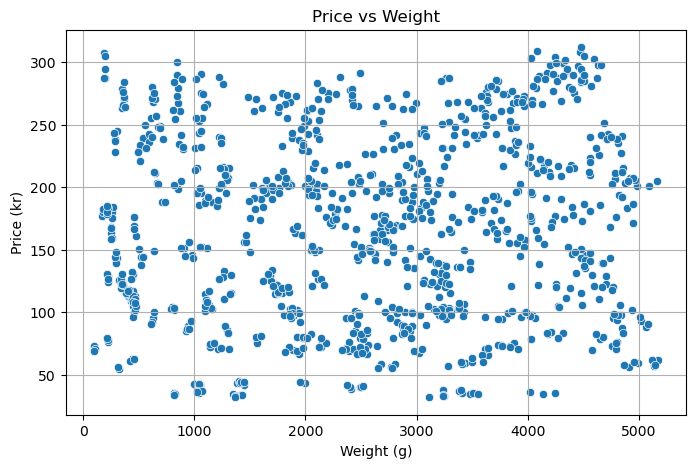

In [ ]:
# Price vs Weight
plt.figure(figsize=(8, 5))
sbn.scatterplot(data=df, x='weight_g', y='price_kr')
plt.title('Price vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Price (kr)')
plt.grid(True)
plt.show()

The scatter plot shows the relationship between seafood weight (g) and price (kr). The points are widely spread, indicating no strong linear correlation. While some heavier products are more expensive, many are not. This is therefor suggesting that weight alone does not determine price. Other factors such as type, season, or freight charge likely have a stronger influence and should be included in further analysis.

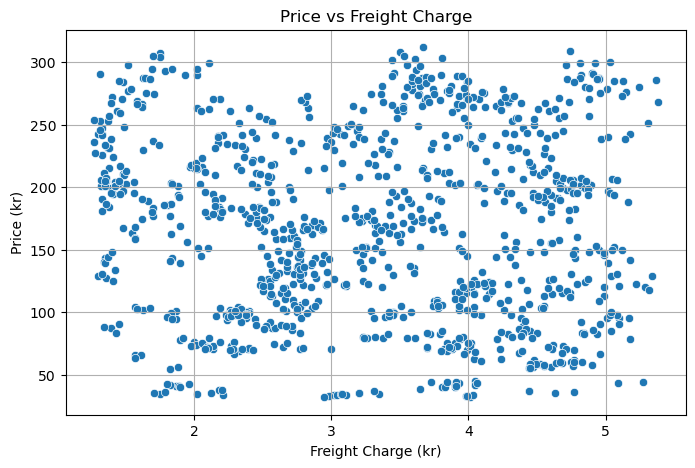

In [20]:
# Price vs Freight Charge
plt.figure(figsize=(8, 5))
sbn.scatterplot(data=df, x='freight_charge_kr', y='price_kr')
plt.title('Price vs Freight Charge')
plt.xlabel('Freight Charge (kr)')
plt.ylabel('Price (kr)')
plt.grid(True)
plt.show()

This scatter plot shows the relationship between freight charge (kr) and seafood price (kr). Similar to the Price vs Weight plot, this distribution is also wide and scattered, with no clear trend or linear correlation. Some products with high freight charges have relatively low prices and vice versa, indicating that freight cost alone is not a strong predictor of price

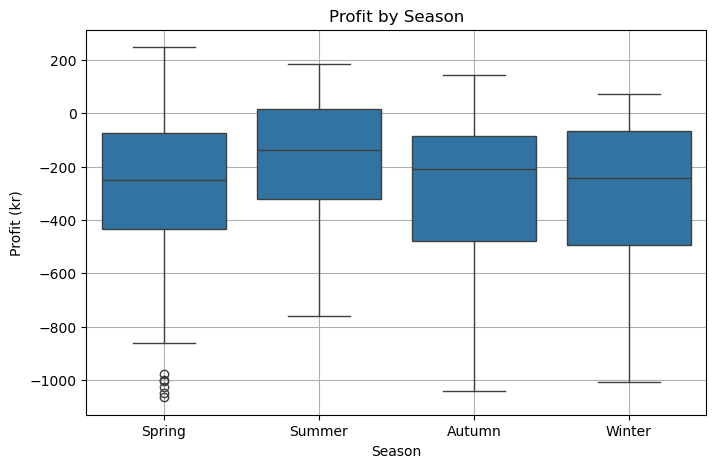

In [21]:
# Profit by Season
season_cols = ['season_availability_Autumn', 'season_availability_Spring', 'season_availability_Summer', 'season_availability_Winter']
df['season'] = df[season_cols].idxmax(axis=1).str.replace('season_availability_', '')

plt.figure(figsize=(8, 5))
sbn.boxplot(data=df, x='season', y='profit_kr')
plt.title('Profit by Season')
plt.xlabel('Season')
plt.ylabel('Profit (kr)')
plt.grid(True)
plt.show()

This boxplot shows how profit (kr) varies by season. Summer stands out with the highest median profit and the least variation, suggesting it may be the most stable and potentially profitable season overall. In contrast, Spring, Autumn, and Winter show lower median profits and wider spreads, with Spring having the most extreme negative outliers.

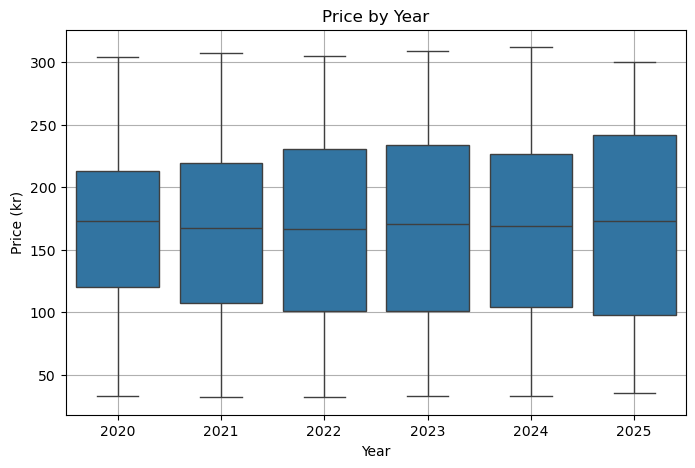

In [22]:
# Price by Year
plt.figure(figsize=(8, 5))
sbn.boxplot(data=df, x='year', y='price_kr')
plt.title('Price by Year')
plt.xlabel('Year')
plt.ylabel('Price (kr)')
plt.grid(True)
plt.show()

This boxplot illustrates the distribution of seafood prices (kr) from 2020 to 2025. While the median price remains fairly stable across the years, there is a noticeable increase in price variation over time, especially in 2025, which shows the widest spread. The data suggests that yearly trends should be considered in pricing strategies, even though no strong linear growth is visible in the median.

In [23]:
# Correlation Heatmap 1
cols_price_focus = [
    'price_kr', 'weight_g', 'length_cm', 'width_cm', 'height_cm',
    'freight_charge_kr', 'year',
    'season_availability_Autumn', 'season_availability_Spring',
    'season_availability_Summer', 'season_availability_Winter'
]


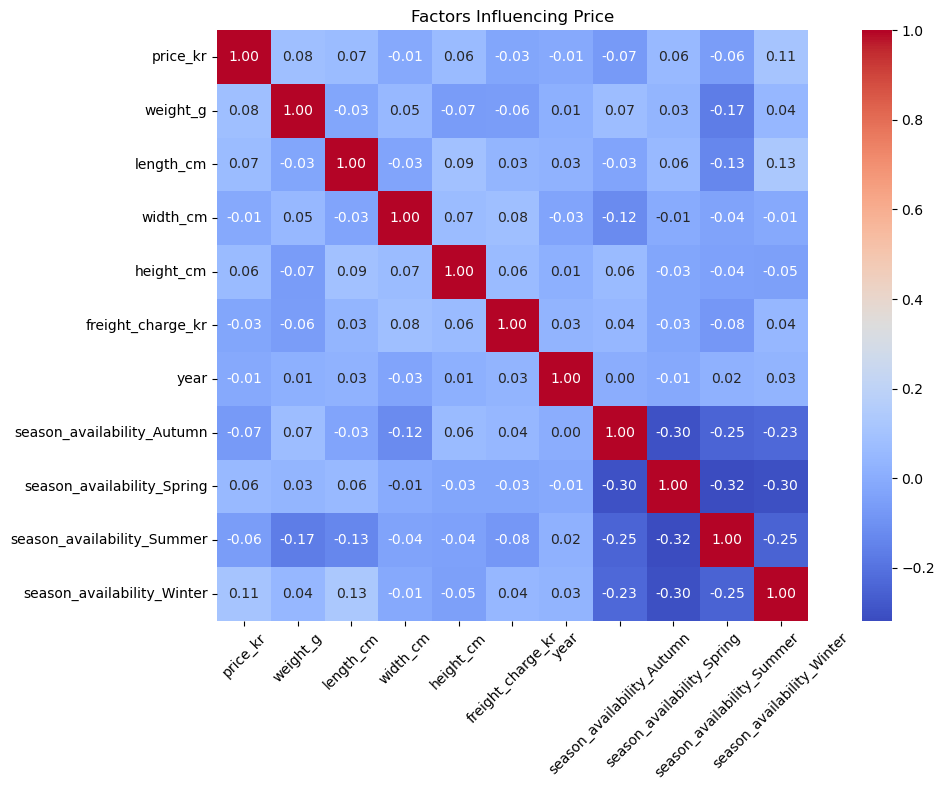

In [24]:
plt.figure(figsize=(12, 8))
sbn.heatmap(df[cols_price_focus].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Factors Influencing Price')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="color:#1E824C">  Factors Influencing Price </span>

The first heatmap reveals how features like weight, length, season, and freight charge correlate with the seafood price. Notably:
* Most variables have only a weak correlation with price_kr.
* The year and freight charge show almost no linear relationship to price.
* The strongest (though still weak) correlation is seen between price and seasonal availability (Winter)

In [25]:
# Correlation Heatmap 2
cols_profit_focus = [
    'profit_kr', 'price_kr', 'cost_kr',
    'freight_charge_kr', 'weight_g', 'year',
    'season_availability_Autumn', 'season_availability_Spring',
    'season_availability_Summer', 'season_availability_Winter'
]


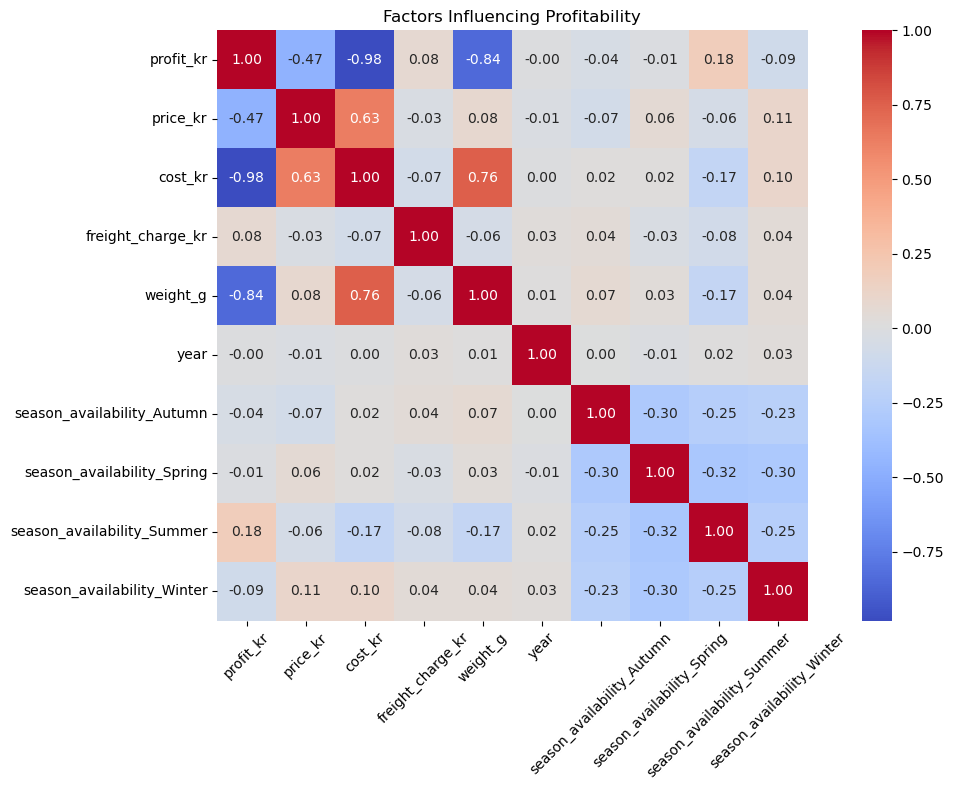

In [26]:
plt.figure(figsize=(12, 8))
sbn.heatmap(df[cols_profit_focus].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Factors Influencing Profitability')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="color:#1E824C"> Factors Influencing Profitability </span>

The second heatmap shifts focus to what drives profit_kr:
* Cost is very strongly negatively correlated with profit.
* Weight also has a strong negative correlation with profit, indicating heavier items may not always be the most profitable.
* Seasonal effects again show minor influence.

#### <span style="color:#1E824C">  Check the distribution of the values of the attributes</span>
* price_kr
* cost_kr
* weight_g
* length_cm
* width_cm
* height_cm
* freight_charge_kr

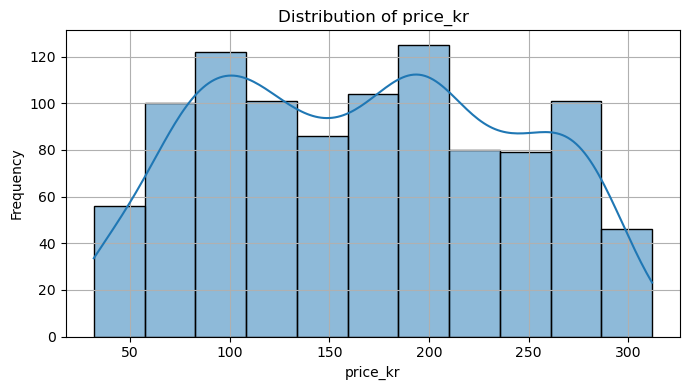

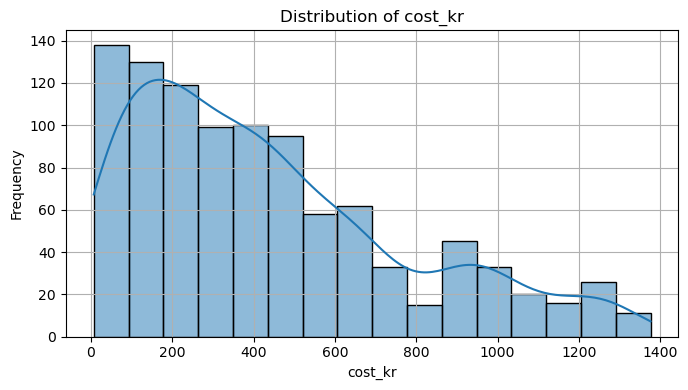

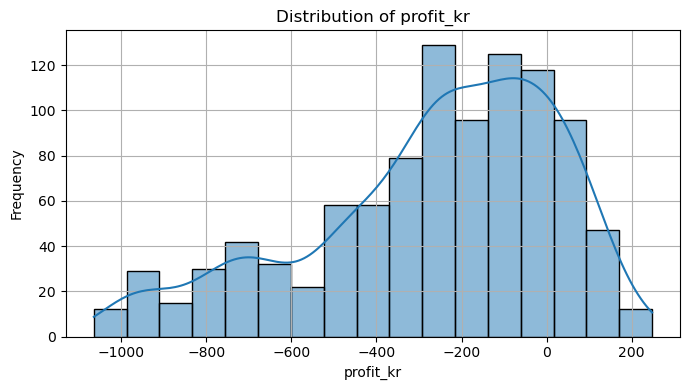

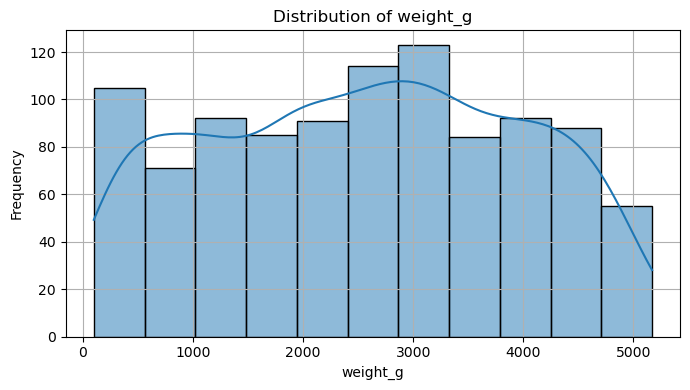

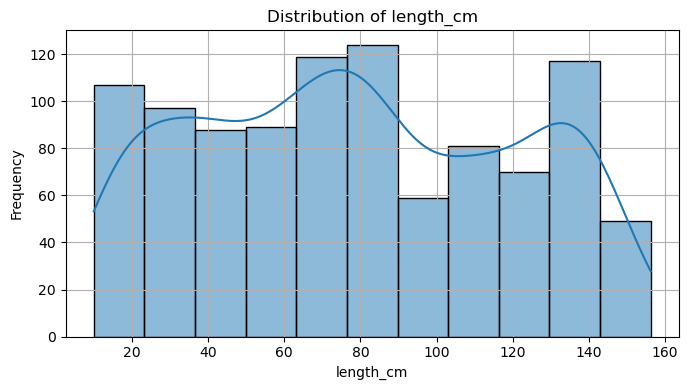

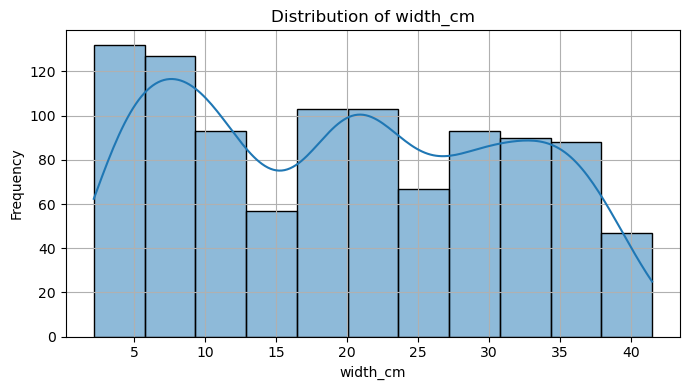

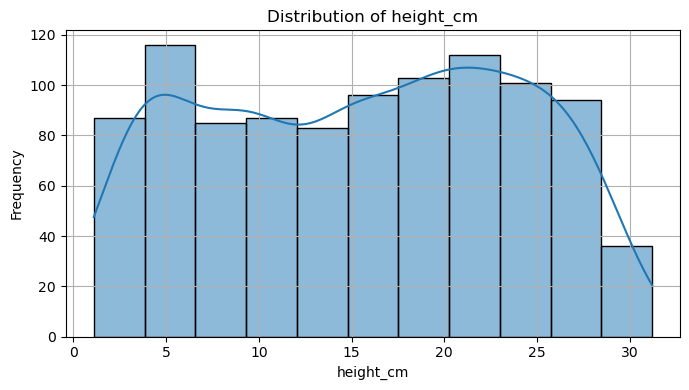

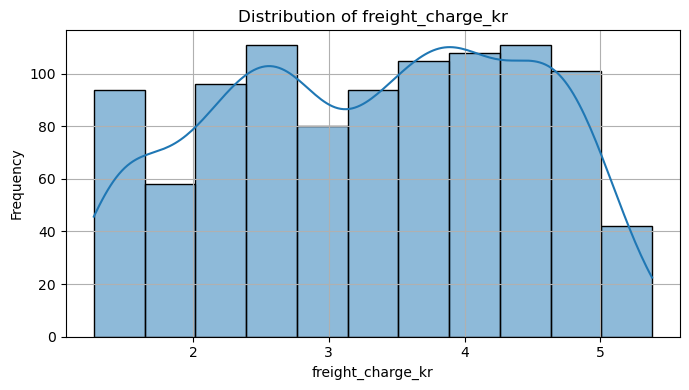

In [27]:
    cols = ['price_kr', 'cost_kr', 'profit_kr', 'weight_g', 'length_cm', 'width_cm', 'height_cm', 'freight_charge_kr']

    for col in cols:
        plt.figure(figsize=(7, 4))
        sbn.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

### <span style="color:#1E824C">  Distribution output </span>
* **'price_kr':**
    The distribution is bimodal, possibly indicating two different pricing strategies or product groups. The distribution is slightly skewed left and right at different points, indicating some variation in pricing behavior.
* **'cost_kr':**
    Most of the bars are stacked toward the left, meaning many items have a low cost, with only a few expensive outliers.
* **'profit_kr':**
    The distribution reveals that the majority of products are unprofitable, which could point to: 
    1. Pricing being too low compared to cost. 
    2. High freight or production costs not accounted for. 
    3. Errors in cost or price data.
    
* **'weight_g':**
     Suggests a balanced distribution. This is caused due to a decline at both low and high ends, meaning  extremely light or heavy items are less common.
* **'length_cm':**
    A multimodal distribution indicating distinct length groups, likely reflecting different fish species or product categories.
* **'width_cm':**
    This distribution is right-skewed, with most items being relatively slim. It suggests that slim packaging or small-bodied seafood dominates the dataset
* **'height_cm':**
    A multimodal distribution suggesting varied height groups, likely corresponding to different seafood types or packaging formats.
* **'freight_charge_kr':**
    A fairly uniform distribution with a central peak, indicating consistent freight charges across most products.

### <span style="color:#1E824C">  Handle outliers </span>

In [28]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Filter out rows where the column value is outside bounds
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [29]:
df = remove_outliers_iqr(df, cols)

In [30]:
print("Cleaned DataFrame shape:", df.shape)


Cleaned DataFrame shape: (994, 62)


#### <span style="color:#1E824C">  Scale the data </span>

In [31]:
scaler = StandardScaler()

scale_cols = ['weight_g', 'length_cm', 'width_cm', 'height_cm', 
              'freight_charge_kr', 'cost_kr', 'profit_kr']

df[scale_cols] = scaler.fit_transform(df[scale_cols])

### <span style="color:#1E824C"> Save the cleaned dataset </span>

In [32]:
df = df.drop(columns=['season']) 

In [ ]:
 #df.to_csv('..\data/cleaned_fish_shellfish_dataset.csv', index=False)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rebec\AppData\Local\Temp\ipykernel_58736\2538495160.py:1: SyntaxWarning: invalid escape sequence '\d'
  df.to_csv('..\data/cleaned_fish_shellfish_dataset.csv', index=False)


In [34]:
df.columns

Index(['price_kr', 'weight_g', 'length_cm', 'width_cm', 'height_cm', 'cost_kr',
       'year', 'freight_charge_kr', 'profit_kr', 'name_Aborre',
       'name_Blåmusling', 'name_Canadisk_hummer',
       'name_Dansk_10-armet_blæksprutte', 'name_Fjordreje', 'name_Fjæsing',
       'name_Flodkrebs', 'name_Gedde', 'name_Havkat', 'name_Havtaske',
       'name_Helleflynder', 'name_Helt', 'name_Hornfisk', 'name_Hvilling',
       'name_Ising', 'name_Jomfruhummer', 'name_Knude', 'name_Knurhane',
       'name_Kuller', 'name_Kulmule', 'name_Laks_vild', 'name_Lange',
       'name_Levende_norsk_kongekrabbe', 'name_Line_blåmusling', 'name_Lyssej',
       'name_Makrel', 'name_Multe', 'name_Mørksej', 'name_Nordsøreje',
       'name_Norske_kammusling_i_skal', 'name_Pighvar', 'name_Rødspætte',
       'name_Rødtunge', 'name_Sandart', 'name_Signalkrebs', 'name_Sild',
       'name_Skrubbe', 'name_Skærising', 'name_Slethvar', 'name_Smelt',
       'name_Sort_hummer', 'name_Stenbider', 'name_Torsk', 'name_Ørred'